In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import OpenWeather_API_KEY
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
import requests

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [5]:
cities

['husavik',
 'minab',
 'ushuaia',
 'zhigansk',
 'bluff',
 'rikitea',
 'tamandare',
 'busselton',
 'arraial do cabo',
 'salalah',
 'fortuna',
 'fuerte olimpo',
 'pangnirtung',
 'taolanaro',
 'cape town',
 'tommot',
 'port elizabeth',
 'hermanus',
 'harper',
 'dalvik',
 'butaritari',
 'atuona',
 'ust-kuyga',
 'halalo',
 'samalaeulu',
 'mys shmidta',
 'sitka',
 'yellowknife',
 'norman wells',
 'san patricio',
 'albany',
 'victoria',
 'acapulco',
 'hobart',
 'abu samrah',
 'namibe',
 'cururupu',
 'orotukan',
 'bouar',
 'vaini',
 'jamestown',
 'belushya guba',
 'hobyo',
 'qaanaaq',
 'sungaipenuh',
 'amderma',
 'ilulissat',
 'dukat',
 'marawi',
 'saint george',
 'khatanga',
 'maltahohe',
 'berlevag',
 'gushikawa',
 'phan rang',
 'maragogi',
 'ponta do sol',
 'nome',
 'lebu',
 'mataura',
 'miandrivazo',
 'kaitangata',
 'hilo',
 'carutapera',
 'broken hill',
 'naze',
 'illoqqortoormiut',
 'peschanokopskoye',
 'puerto ayora',
 'port alfred',
 'iqaluit',
 'half moon bay',
 'ribeira grande',
 'ul

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + OpenWeather_API_KEY

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | husavik
Processing Record 2 of Set 1 | minab
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | zhigansk
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | tamandare
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | salalah
Processing Record 11 of Set 1 | fortuna
Processing Record 12 of Set 1 | fuerte olimpo
Processing Record 13 of Set 1 | pangnirtung
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | tommot
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | harper
Processing Record 20 of Set 1 | dalvik
Processing Record 21 of Set 1 | butaritari
Processing Record 22 of Set 1 | atuona
Processing 

Processing Record 36 of Set 4 | jibuti
Processing Record 37 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 38 of Set 4 | pedernales
Processing Record 39 of Set 4 | barbar
City not found. Skipping...
Processing Record 40 of Set 4 | kamaishi
Processing Record 41 of Set 4 | vestmannaeyjar
Processing Record 42 of Set 4 | puerto del rosario
Processing Record 43 of Set 4 | wilmington island
Processing Record 44 of Set 4 | kikwit
Processing Record 45 of Set 4 | waipawa
Processing Record 46 of Set 4 | pizarro
Processing Record 47 of Set 4 | shimanovsk
Processing Record 48 of Set 4 | flinders
Processing Record 49 of Set 4 | georgetown
Processing Record 50 of Set 4 | oriximina
Processing Record 1 of Set 5 | coquimbo
Processing Record 2 of Set 5 | wigston
Processing Record 3 of Set 5 | asbury park
Processing Record 4 of Set 5 | garmsar
Processing Record 5 of Set 5 | suao
City not found. Skipping...
Processing Record 6 of Set 5 | luderitz
Processing Record 7 of Set 5 | petrop

Processing Record 27 of Set 8 | adrar
Processing Record 28 of Set 8 | prince rupert
Processing Record 29 of Set 8 | touros
Processing Record 30 of Set 8 | cabo san lucas
Processing Record 31 of Set 8 | taoudenni
Processing Record 32 of Set 8 | mareeba
Processing Record 33 of Set 8 | kothen
Processing Record 34 of Set 8 | menzelinsk
Processing Record 35 of Set 8 | bandarbeyla
Processing Record 36 of Set 8 | banmo
City not found. Skipping...
Processing Record 37 of Set 8 | santa isabel
Processing Record 38 of Set 8 | witu
Processing Record 39 of Set 8 | bo phloi
Processing Record 40 of Set 8 | nhulunbuy
Processing Record 41 of Set 8 | mogadishu
Processing Record 42 of Set 8 | monte azul
Processing Record 43 of Set 8 | port macquarie
Processing Record 44 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 45 of Set 8 | orvault
Processing Record 46 of Set 8 | miri
Processing Record 47 of Set 8 | samdari
Processing Record 48 of Set 8 | nosy varika
Processing Record 49 of Se

Processing Record 14 of Set 12 | bhadrachalam
Processing Record 15 of Set 12 | ozernovskiy
Processing Record 16 of Set 12 | turbat
Processing Record 17 of Set 12 | mushabani
Processing Record 18 of Set 12 | kahului
Processing Record 19 of Set 12 | grand gaube
Processing Record 20 of Set 12 | vardo
Processing Record 21 of Set 12 | balimo
City not found. Skipping...
Processing Record 22 of Set 12 | barlinek
Processing Record 23 of Set 12 | sahuaripa
Processing Record 24 of Set 12 | atikokan
Processing Record 25 of Set 12 | toufen
Processing Record 26 of Set 12 | vondrozo
Processing Record 27 of Set 12 | victor harbor
Processing Record 28 of Set 12 | pailon
Processing Record 29 of Set 12 | terrace
Processing Record 30 of Set 12 | tautira
Processing Record 31 of Set 12 | iringa
Processing Record 32 of Set 12 | yagodnoye
Processing Record 33 of Set 12 | varnamo
Processing Record 34 of Set 12 | saint-pierre
Processing Record 35 of Set 12 | todos santos
Processing Record 36 of Set 12 | praya


In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Husavik,66.0449,-17.3389,24.30,71,100,16.40,IS,2022-03-14 07:00:34
1,Minab,27.1467,57.0801,89.78,23,0,4.27,IR,2022-03-14 07:00:38
2,Ushuaia,-54.8000,-68.3000,37.06,75,100,17.27,AR,2022-03-14 06:59:48
3,Zhigansk,66.7697,123.3711,-5.98,90,97,12.75,RU,2022-03-14 07:00:47
4,Bluff,-46.6000,168.3333,61.81,80,79,3.27,NZ,2022-03-14 07:00:53
5,Rikitea,-23.1203,-134.9692,80.11,72,55,14.36,PF,2022-03-14 07:00:56
6,Tamandare,-8.7597,-35.1047,77.76,85,87,4.88,BR,2022-03-14 07:00:58
7,Busselton,-33.6500,115.3333,80.13,55,41,14.07,AU,2022-03-14 07:00:58
8,Arraial Do Cabo,-22.9661,-42.0278,76.28,91,0,17.60,BR,2022-03-14 07:01:01
9,Salalah,17.0151,54.0924,82.90,41,5,7.20,OM,2022-03-14 07:01:01


In [9]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

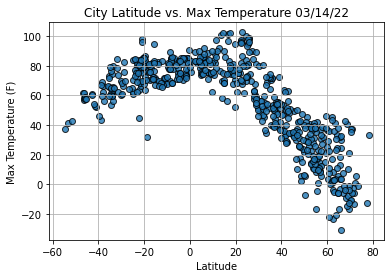

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/latitude_vs_max_temp.png")

# Show plot.
plt.show()

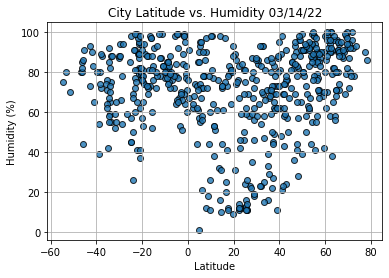

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/latitude_vs_humidity.png")
# Show plot.
plt.show()

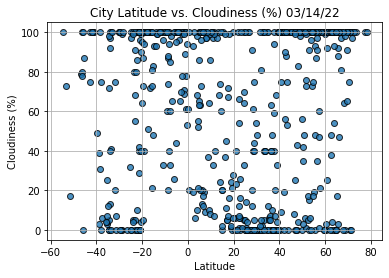

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/latitude_vs_cloudiness.png")
# Show plot.
plt.show()

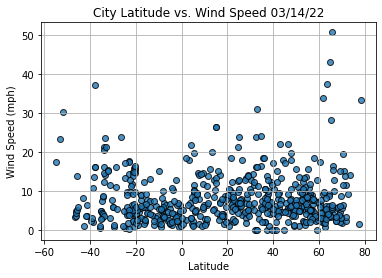

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/latitude_vs_wind_speed.png")
# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
index13 = city_data_df.loc[13]
index13

City                    Cape Town
Country                        ZA
Date          2022-03-14 07:01:03
Lat                      -33.9258
Lng                       18.4232
Max Temp                    62.11
Humidity                       59
Cloudiness                     97
Wind Speed                   14.7
Name: 13, dtype: object

In [18]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Husavik,IS,2022-03-14 07:00:34,66.0449,-17.3389,24.30,71,100,16.40
1,Minab,IR,2022-03-14 07:00:38,27.1467,57.0801,89.78,23,0,4.27
3,Zhigansk,RU,2022-03-14 07:00:47,66.7697,123.3711,-5.98,90,97,12.75
9,Salalah,OM,2022-03-14 07:01:01,17.0151,54.0924,82.90,41,5,7.20
10,Fortuna,US,2022-03-14 07:01:01,40.5982,-124.1573,47.66,89,75,0.00


In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

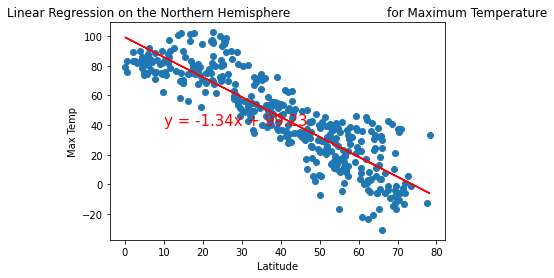

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

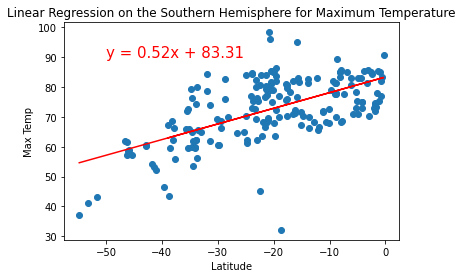

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

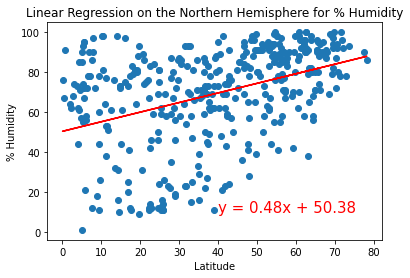

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

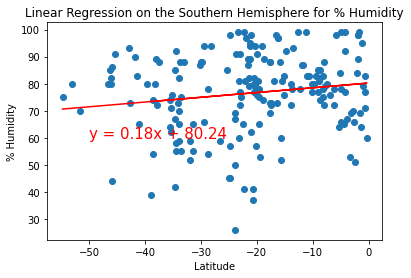

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,60))

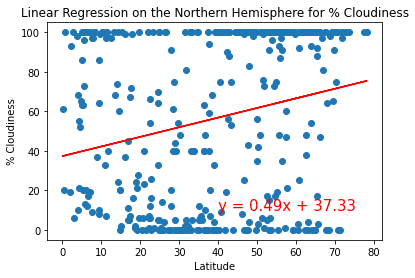

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

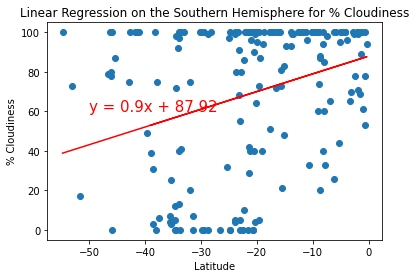

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

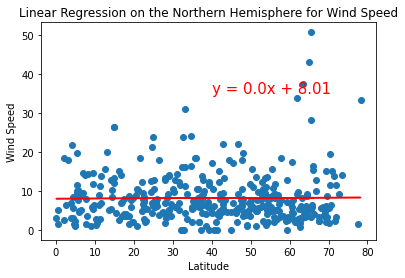

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

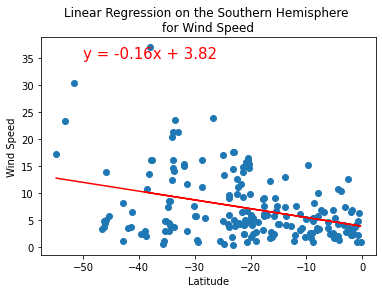

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))